In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
def GinUE(dim):
    """Generate a random matrix from the Ginibre Unitary Ensemble (GinUE)."""
    return np.random.normal(0, 1/np.sqrt(2), (dim, dim)) + 1j * np.random.normal(0, 1/np.sqrt(2), (dim, dim))

def GinOE(dim):
    """Generate a random matrix from the Ginibre Unitary Ensemble (GinUE)."""
    return np.random.normal(0, 1/np.sqrt(2), (dim, dim))

  0%|          | 0/1000 [00:00<?, ?it/s]

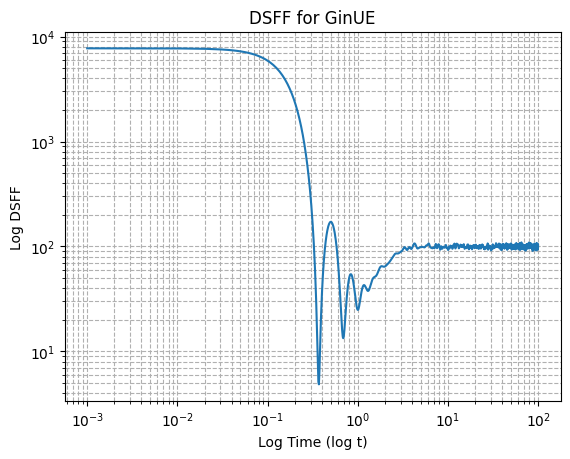

In [6]:
def compute_dsff(z_n, tau):
    """Compute the DSFF for a given set of eigenvalues and a complex time tau."""
    tau_star = np.conj(tau)
    sum_exp = np.sum(np.exp(1j * (z_n * tau_star + np.conj(z_n) * tau) / 2)) #equation from ghosh et.al
    return np.abs(sum_exp)**2

N = 100  # Size of the Ginibre matrix
ensemble_size = 1000  # Number of matrices to average over for the DSFF
t_values = np.linspace(0.001, 100, 20000)  # Real time values
#s_values = np.linspace(0.001, 100, 20000)  # Real time values
s = 0.1  # Fixed s

#dsff_values = np.zeros((len(t_values), len(s_values)), dtype=np.complex_)
dsff_values = np.zeros_like(t_values)

for _ in tqdm(range(ensemble_size)): #ensemble average
    ginibre_matrix = GinUE(N)
    eigenvalues = np.linalg.eigvals(ginibre_matrix) #eigs between
    for i, t in enumerate(t_values):
        tau = t + 1j*s #(fixed t)
        dsff_values[i] += compute_dsff(eigenvalues, tau)

# Averaging over the ensemble
dsff_values /= ensemble_size

# Plotting
# plt.plot(t_values, dsff_values, label=f'DSFF for GinUE, N={N}')
# plt.xlabel('Time (t)')
# plt.ylabel('DSFF')
# plt.title('Dissipative Spectral Form Factor (DSFF) for GinUE')
# #plt.legend()
# plt.show()

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF for GinUE')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
plt.show()

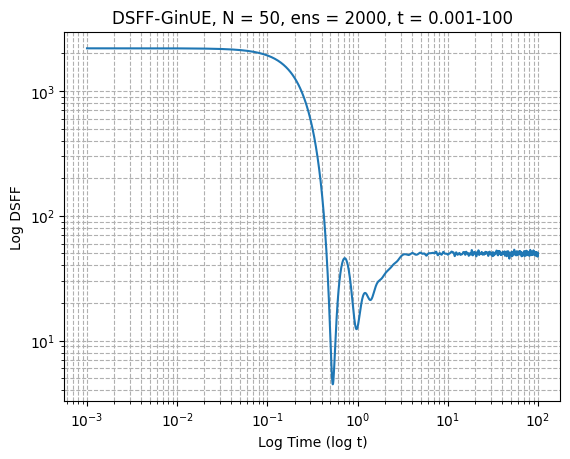

In [5]:
plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinUE, N = 50, ens = 2000, t = 0.001-100')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

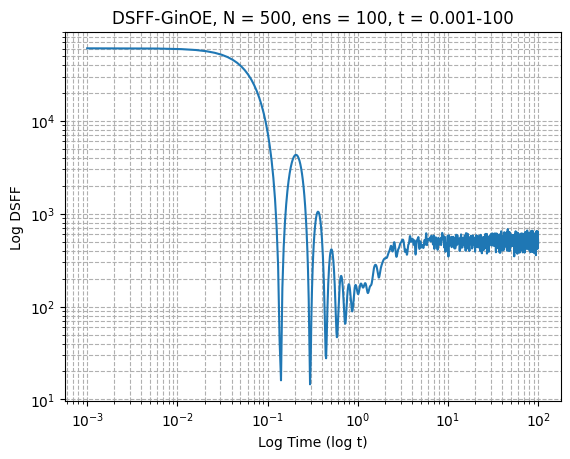

In [ ]:
plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinUE, N = 500, ens = 100, t = 0.001-100')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

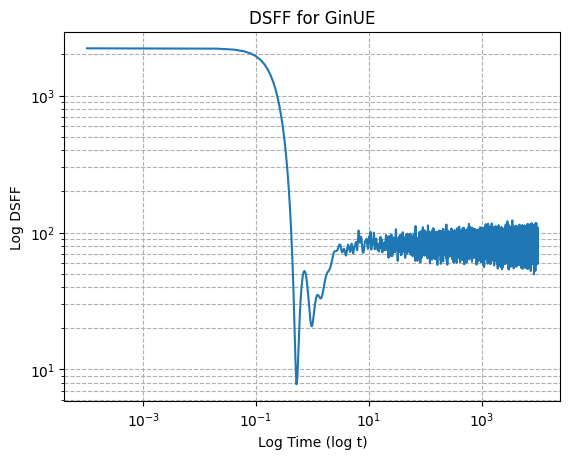

In [ ]:
def compute_dsff(z_n, tau):
    """Compute the DSFF for a given set of eigenvalues and a complex time tau."""
    tau_star = np.conj(tau)
    sum_exp = np.sum(np.exp(1j * (z_n * tau_star + np.conj(z_n) * tau) / 2)) #equation from ghosh et.al
    return np.abs(sum_exp)**2

N = 50  # Size of the Ginibre matrix
ensemble_size = 100  # Number of matrices to average over for the DSFF
t_values = np.linspace(0.0001, 10000, 500000)  # Real time values
s_values = np.linspace(0.0001, 10000, 500000)  # Real time values
s = 0.1  # Fixed dissipation value for simplicity

#dsff_values = np.zeros((len(t_values), len(s_values)), dtype=np.complex_)
dsff_values = np.zeros_like(t_values)

for _ in tqdm(range(ensemble_size)): #ensemble average
    ginibre_matrix = GinOE(N)
    eigenvalues = np.linalg.eigvals(ginibre_matrix) #eigs between
    for i, t in enumerate(t_values):
        tau = t + 1j*s #(fixed t )
        dsff_values[i] += compute_dsff(eigenvalues, tau)

# Averaging over the ensemble
dsff_values /= ensemble_size

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF for GinUE')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
plt.show()

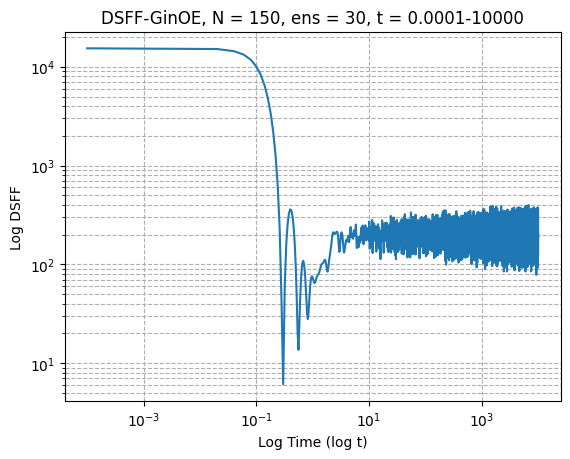

In [ ]:
###~5.3mins

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinOE, N = 150, ens = 30, t = 0.0001-10000')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

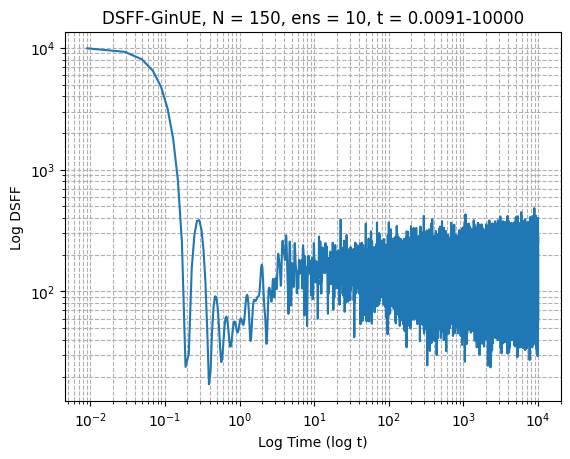

In [ ]:
###~2mins

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinUE, N = 150, ens = 10, t = 0.0091-10000')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

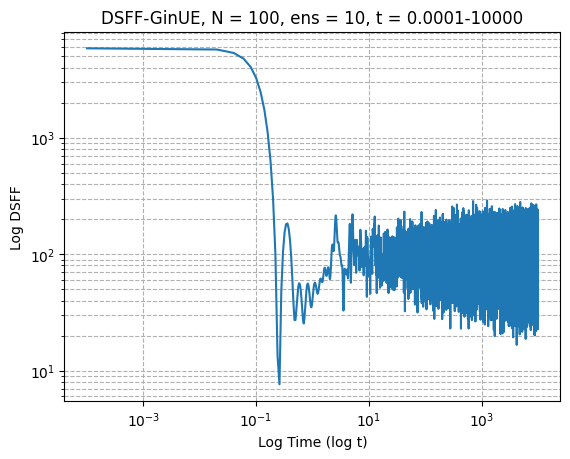

In [ ]:
###~2mins

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinUE, N = 100, ens = 10, t = 0.0001-10000')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

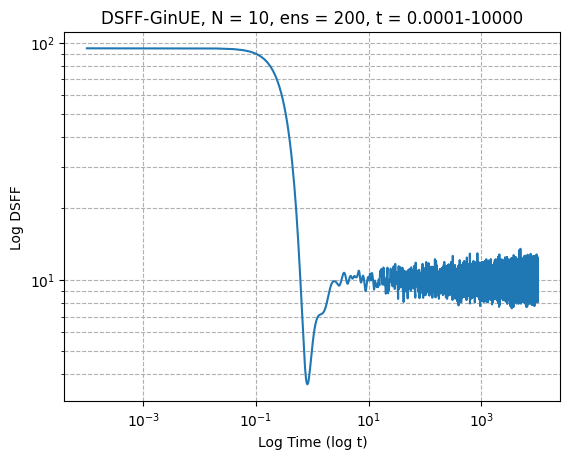

In [ ]:
###25mins

plt.loglog(t_values, dsff_values, label=f'Log-Log DSFF for GinUE, N={N}')
plt.xlabel('Log Time (log t)')
plt.ylabel('Log DSFF')
plt.title('DSFF-GinUE, N = 10, ens = 200, t = 0.0001-10000')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
plt.savefig('DSFF_GinUE_loglog_plot-n10ens200.png', format='png', dpi=300)  # Specify the filename, format, and DPI
plt.show()

In [ ]:
# def compute_dsff(z_n, t_values, s_values):
#     """
#     Compute the Dissipative Spectral Form Factor (DSFF) over a range of time (t) and dissipation (s) values.

#     Parameters:
#     - z_n: Array of complex eigenenergies of the system.
#     - t_values: Array of real time values.
#     - s_values: Array of dissipation (imaginary time) values.

#     Returns:
#     - K_tau: Matrix of DSFF values for each (t, s) pair.
#     """
#     K_tau = np.zeros((len(t_values), len(s_values)), dtype=np.complex_)

#     for i, t in enumerate(t_values):
#         for j, s in enumerate(s_values):
#             tau = t + 1j*s
#             tau_star = np.conj(tau)
#             sum_exp = np.sum(np.exp(1j * (z_n * tau_star + np.conj(z_n) * tau) / 2), axis=0)
#             K_tau[i, j] = np.abs(sum_exp)**2

#     return K_tau

# # Plotting
# plt.plot(t_values, dsff_values, label=f'DSFF for GinUE, N={N}')
# plt.xlabel('Time (t)')
# plt.ylabel('DSFF')
# plt.title('Dissipative Spectral Form Factor (DSFF) for GinUE')
# plt.legend()
# plt.show()